**Loan Default Prediction**

Loan defaults are a major issues for banks and in the past have ruined the credibility and even the existence of major finanicla institutions. The objective of this project is to create a predictive model that can reliably predict loan defaults. A successful solution to this problem would have several positive effects. The financial impact of implementing an effective loan default prediction model would minimize risk and financial loss for lenders. From the borrower's perspective, being trustworthy means the financial institution will offer a lower interest rate. Overall, being able to better identify loan default among borrowers will improve the health and trustwortiness of the entire financial environment for both parties.

Data Source:
https://www.kaggle.com/datasets/nikhil1e9/loan-default/data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('Loan Default.csv')
loan.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44     Bachelor   
1               1          4.81        60      0.68       Master   
2               3         21.17        24      0.31       Master   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73     Bachelor   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

**Descriptive Statistics and Features**

In [ ]:
loan.shape

(255347, 18)

<Axes: >

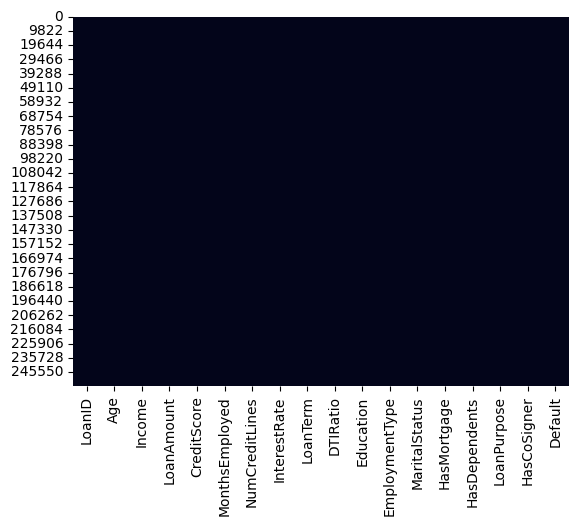

In [ ]:
sns.heatmap(loan.isnull(), cbar = False)

In [ ]:
loan.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
loan.var() <0.0001

Age               False
Income            False
LoanAmount        False
CreditScore       False
MonthsEmployed    False
NumCreditLines    False
InterestRate      False
LoanTerm          False
DTIRatio          False
Default           False
dtype: bool

In [9]:
loan = loan.drop('LoanID', axis = 1)
loan.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44     Bachelor      Full-time      Divorced   
1          4.81        60      0.68       Master      Full-time       Married   
2         21.17        24      0.31       Master     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73     Bachelor     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes           Yes       Other         Yes        0  
1          No            No       Other         Yes        0  
2         Yes           Yes        Auto          No        1  
3          No            No    Business          No        0  
4          No           Yes        Auto          No        0

In [ ]:
loan.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

<Axes: xlabel='Default', ylabel='Count'>

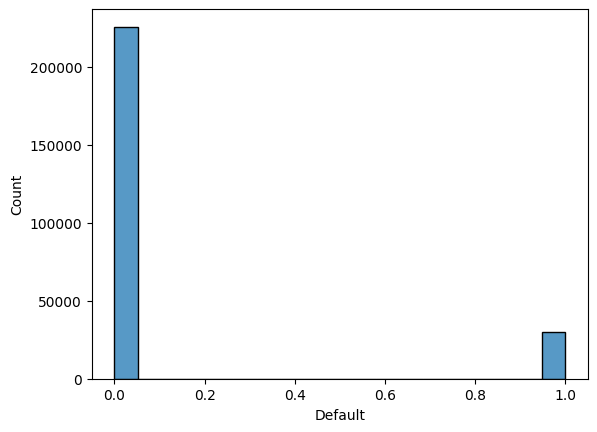

In [ ]:
sns.histplot(loan.Default)

Text(0.5, 1.0, 'Correlation Matrix')

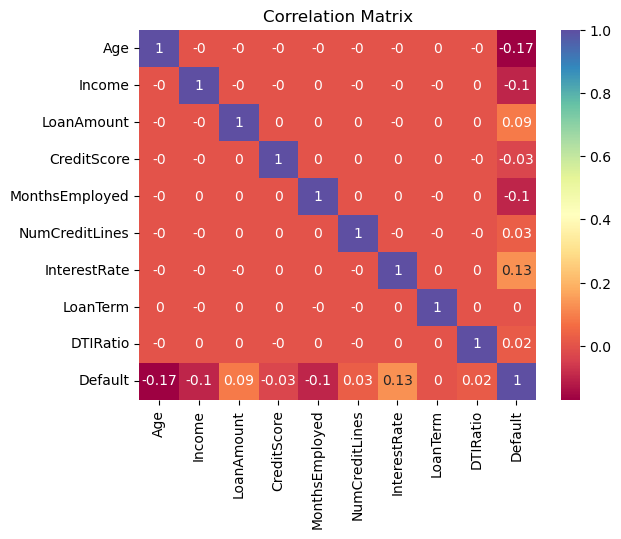

In [7]:
sns.heatmap(round(loan.corr(), 2), cmap = "Spectral", annot = True)
plt.title('Correlation Matrix')

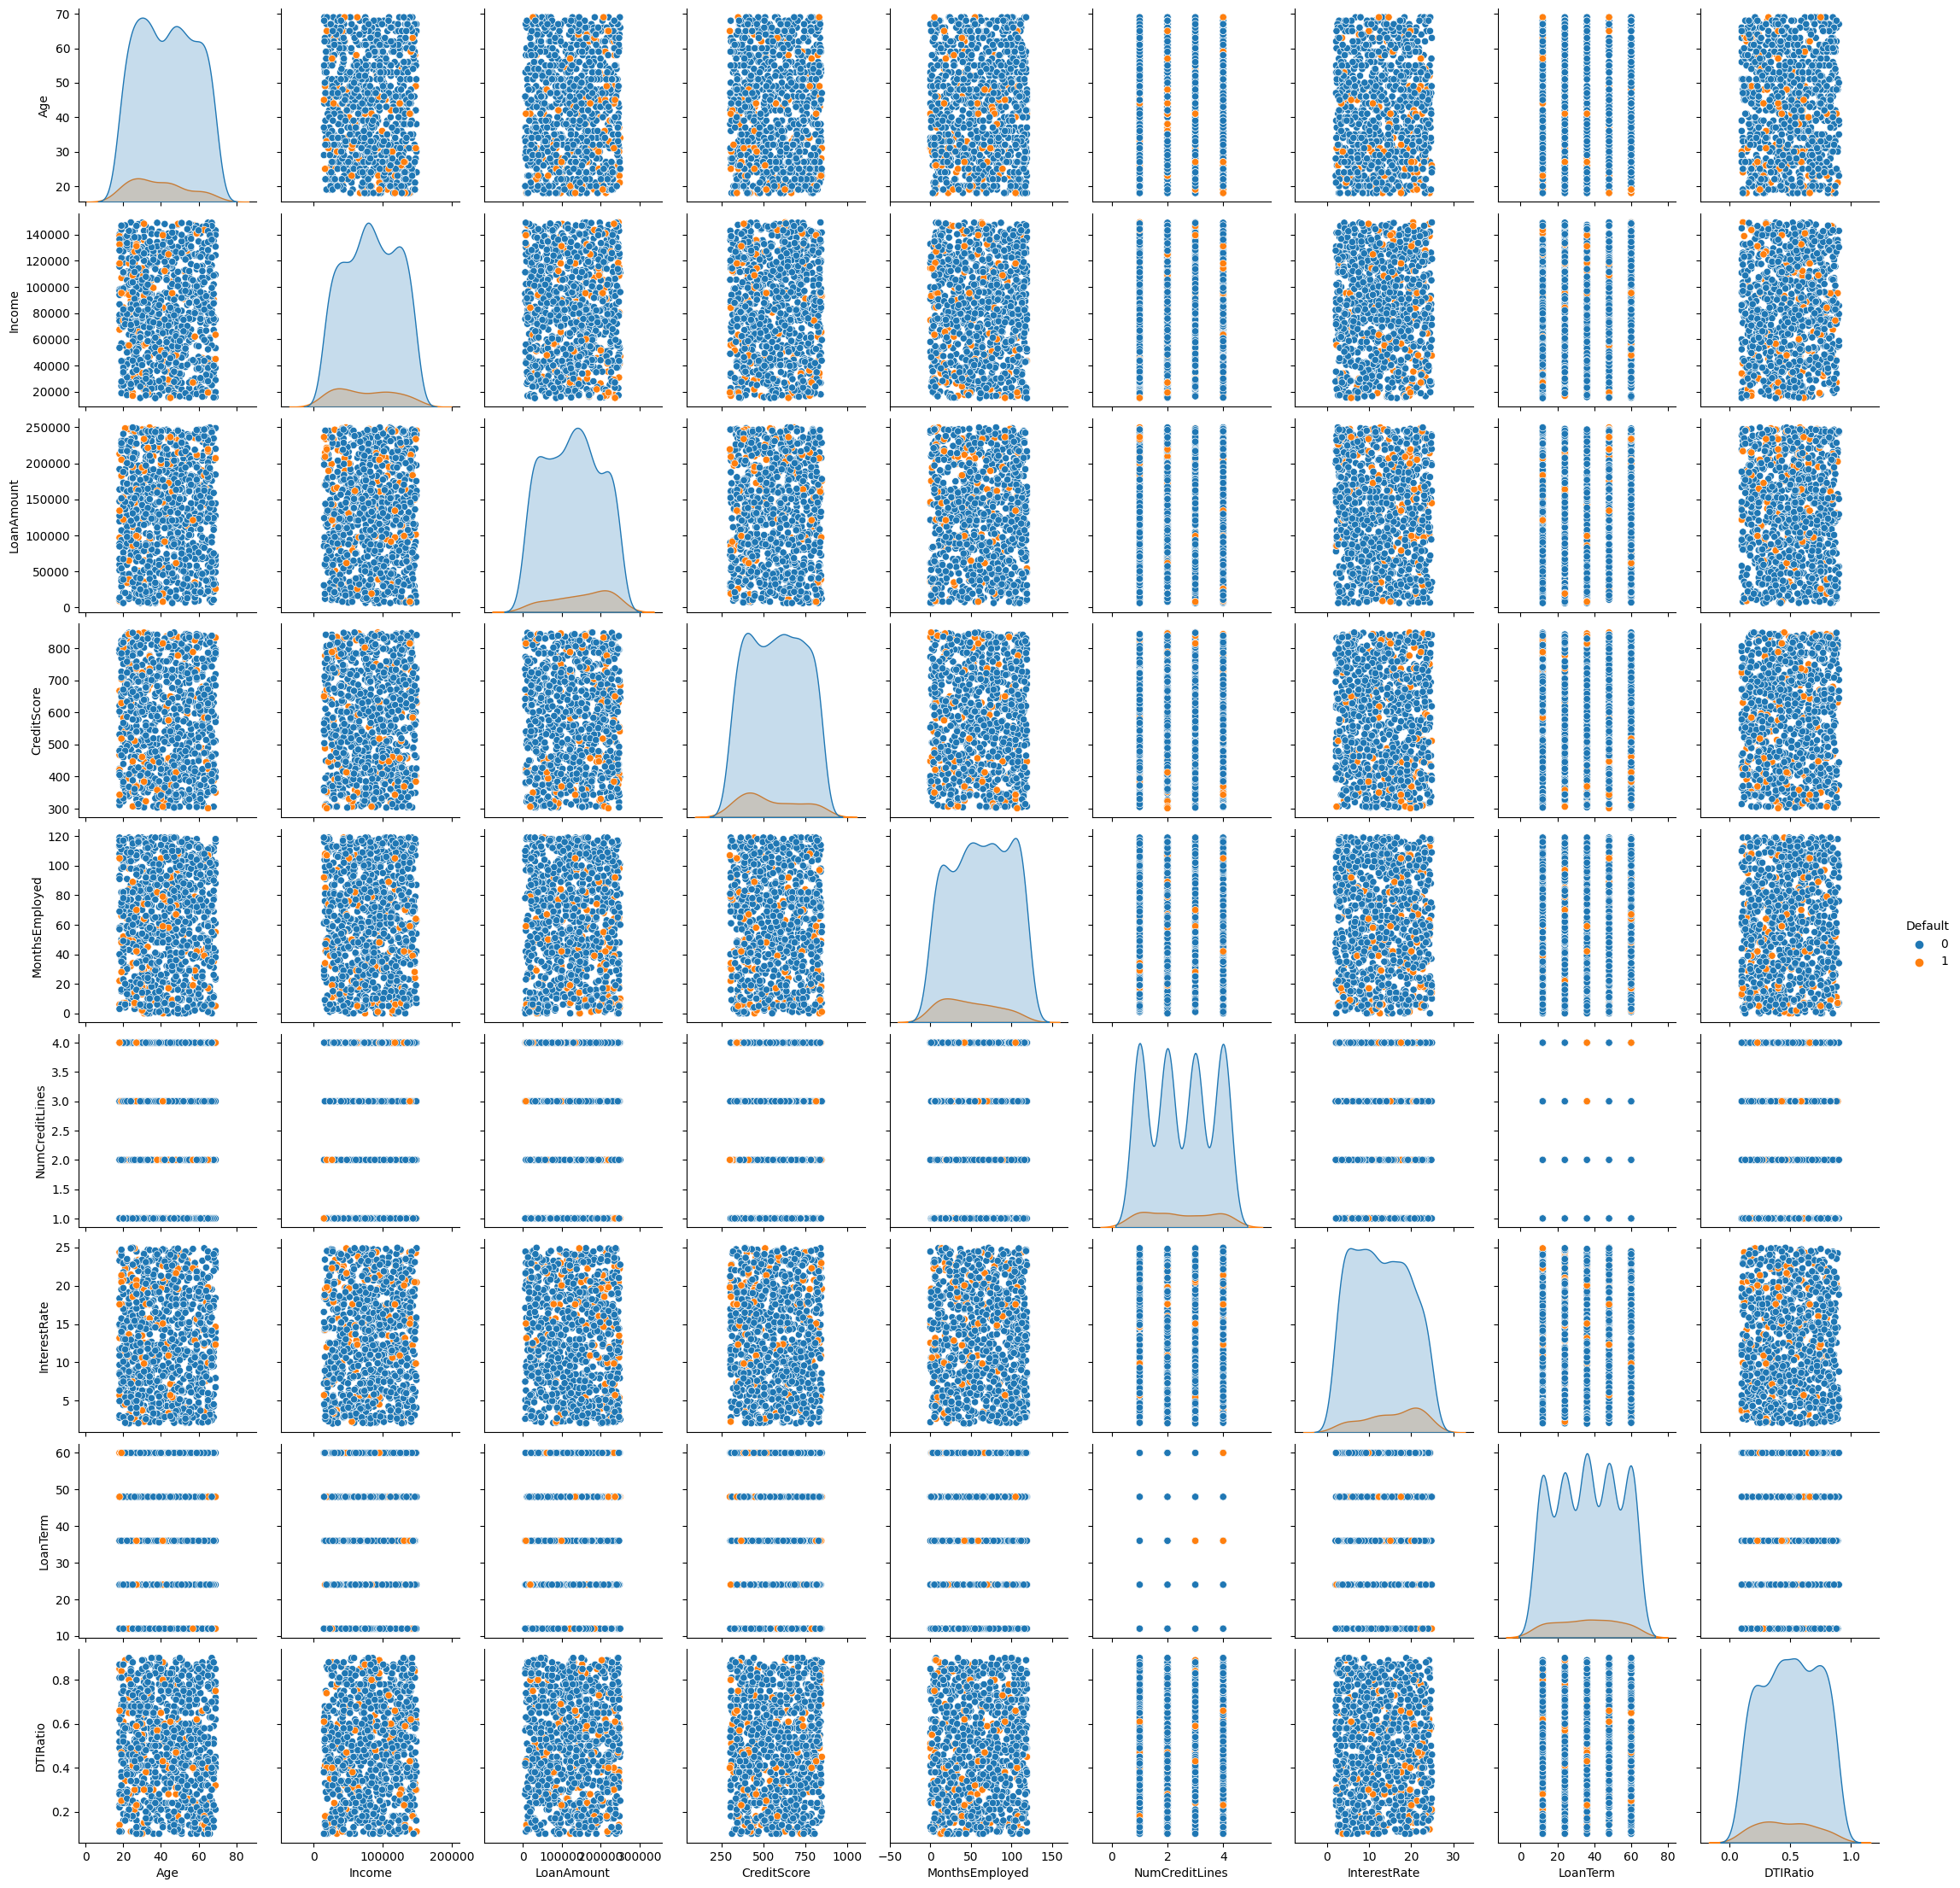

In [ ]:
sns.pairplot(loan.sample(1000), hue = 'Default')

There is 18 feautres with over 250,000 records. There also no missing values or features with 0 variance. However LoanID must be dropped since it has no predictive value. There is also little to no correlation between any of the feautres.

**Data Preprocessing**

In [3]:
!pip install eli5
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import eli5
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from eli5.sklearn import PermutationImportance


     -------------------------------------- 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107768 sha256=cc4eb0b764d5e43c654a2911b09d7b8539b1bd30ecb092fd7391b6b5acd9b154
  Stored in directory: c:\users\bryce\appdata\local\pip\cache\wheels\79\6c\4b\13ea3238d017bc19711b4312359e2c95be91a1a9d60d949572
Successfully built eli5


In [10]:
Imputed = pd.get_dummies(loan, drop_first = True)
Imputed.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Default  ...  EmploymentType_Unemployed  \
0         15.23        36      0.44        0  ...                          0   
1          4.81        60      0.68        0  ...                          0   
2         21.17        24      0.31        1  ...                          1   
3          7.07        24      0.23        0  ...                          0   
4          6.51        48      0.73        0  ...                          1   

   MaritalStatus_Married  MaritalStatus_Single  HasMortgage_Yes  \
0                      0                     0                1   
1                      1                     0                0   
2                      0                     0                1   
3                      1                     0                0   
4                      0                     0                0   

   HasDependents_Yes  LoanPurpose_Business  LoanPurpose_Education  \
0                  1                     0                      0   
1                  0                     0                      0   
2                  1                     0                      0   
3                  0                     1                      0   
4                  1                     0                      0   

   LoanPurpose_Home  LoanPurpose_Other  HasCoSigner_Yes  
0                 0                  1                1  
1                 0                  1                1  
2                 0                  0                0  
3                 0                  0                0  
4                 0                  0                0  

[5 rows x 25 columns]

In [11]:
X = Imputed.drop('Default', axis = 1)
Y = Imputed.Default

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns = X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size = 0.3, random_state = 1)

**Classification Models Creation**

**Logistic Regression**

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

y_pred_LR = logmodel.predict(X_test)

y_pred_prob_LR = logmodel.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_LR))
print(confusion_matrix(Y_test, y_pred_LR))
print(classification_report(Y_test, y_pred_LR))

ROC AUC:  0.7475470755416593
[[67603   178]
 [ 8520   304]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67781
           1       0.63      0.03      0.07      8824

    accuracy                           0.89     76605
   macro avg       0.76      0.52      0.50     76605
weighted avg       0.86      0.89      0.84     76605



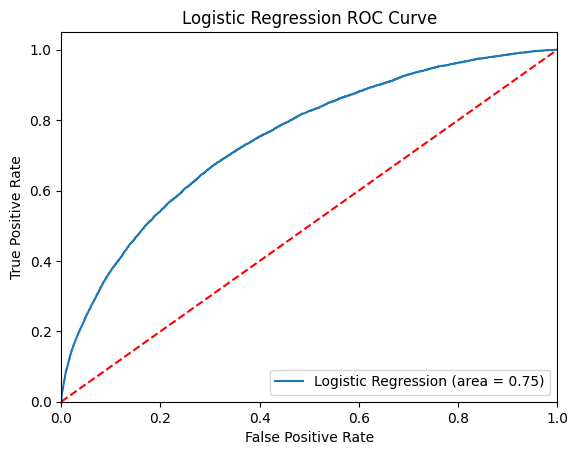

In [ ]:
logit_roc_auc = roc_auc_score(Y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob_LR)
plt.figure
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**kNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)

y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_knn))
print(confusion_matrix(Y_test,y_pred_knn))
print(classification_report(Y_test,y_pred_knn))

ROC AUC:  0.5825630047629664
[[66730  1051]
 [ 8466   358]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67781
           1       0.25      0.04      0.07      8824

    accuracy                           0.88     76605
   macro avg       0.57      0.51      0.50     76605
weighted avg       0.81      0.88      0.83     76605



In [ ]:
max_K = 100
cv_scores = []

for K in range (1, max_K):
  knn = KNeighborsClassifier(n_neighbors = K)
  scores = cross_val_score(knn,X_train,Y_train.values.ravel(), cv = 5, scoring = "roc_auc" )
  cv_scores.append(scores.mean())

ax = sns.lineplot( x = range(1, max_K), y = cv_scores)
ax.set(xlabel = "K", ylabel = "ROC AUC")
ax

**Optimized K-Neighbors**

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=35, metric='euclidean')
knn1.fit(X_train, Y_train)

y_pred_knn1 = knn1.predict(X_test)

y_pred_prob_knn1 = knn1.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_knn1))
print(confusion_matrix(Y_test,y_pred_knn1))
print(classification_report(Y_test,y_pred_knn1))

ROC AUC:  0.6453388183823795
[[67780     1]
 [ 8822     2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67781
           1       0.67      0.00      0.00      8824

    accuracy                           0.88     76605
   macro avg       0.78      0.50      0.47     76605
weighted avg       0.86      0.88      0.83     76605



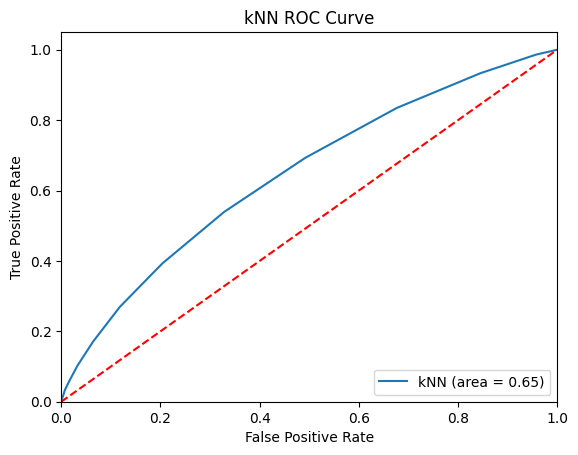

In [ ]:
knn_roc_auc = roc_auc_score(Y_test, knn1.predict_proba(X_test)[:,1])
fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob_knn1)
plt.figure
plt.plot(fpr, tpr, label = 'kNN (area = %0.2f)' %knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(max_depth = 7, random_state = 1)
rf_model.fit(X_test, Y_test)

y_pred_rf = rf_model.predict(X_test)

y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_rf))
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

ROC AUC:  0.7748272434730363
[[67781     0]
 [ 8820     4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67781
           1       1.00      0.00      0.00      8824

    accuracy                           0.88     76605
   macro avg       0.94      0.50      0.47     76605
weighted avg       0.90      0.88      0.83     76605



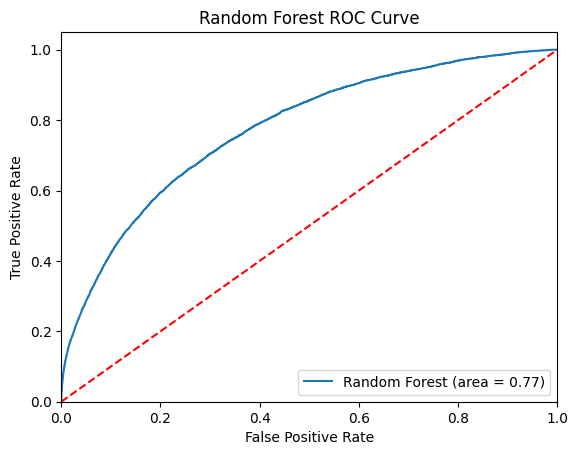

In [ ]:
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:,1])
fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob_rf)
plt.figure
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' %rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Boosted Tree**

In [ ]:
bt_model = AdaBoostClassifier(n_estimators = 100)
bt_model.fit(X_train, Y_train)

y_pred_bt = bt_model.predict(X_test)

y_pred_prob_bt = bt_model.predict_proba(X_test)[:, 1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_bt))
print(confusion_matrix(Y_test, y_pred_bt))
print(classification_report(Y_test, y_pred_bt))

ROC AUC:  0.7493295346836111
[[67500   281]
 [ 8370   454]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67781
           1       0.62      0.05      0.09      8824

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.52     76605
weighted avg       0.86      0.89      0.84     76605



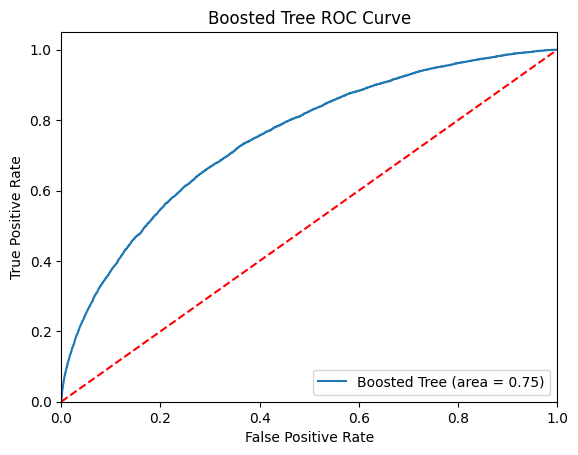

In [ ]:
bt_roc_auc = roc_auc_score(Y_test, bt_model.predict_proba(X_test)[:,1])
fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob_bt)
plt.figure
plt.plot(fpr, tpr, label = 'Boosted Tree (area = %0.2f)' %bt_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Boosted Tree ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Naive Model**

In [12]:
nb_model = MultinomialNB(alpha = 0.1)
nb_model.fit(X_train, Y_train)

y_pred_nb = nb_model.predict(X_test)
y_pred_prob_nb = nb_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(Y_test, y_pred_prob_nb))
print(confusion_matrix(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))

ROC AUC:  0.6985286348922546
[[67781     0]
 [ 8824     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67781
           1       0.00      0.00      0.00      8824

    accuracy                           0.88     76605
   macro avg       0.44      0.50      0.47     76605
weighted avg       0.78      0.88      0.83     76605



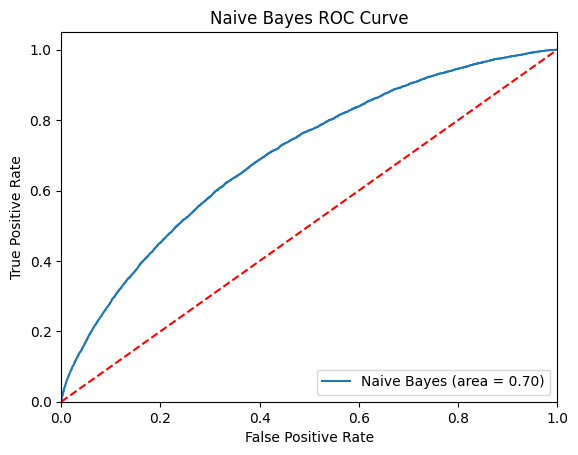

In [ ]:
nb_roc_auc = roc_auc_score(Y_test, nb_model.predict_proba(X_test)[:,1])
fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob_nb)
plt.figure
plt.plot(fpr, tpr, label = 'Naive Bayes (area = %0.2f)' %nb_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Artificial Neural Network**

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes = 20, activation = 'logistic', solver = 'adam', max_iter = 1000, random_state = 1)
MLPC_model.fit(X_train, Y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print("ROC AUC: ", roc_auc_score(Y_test, MLPC_model.predict_proba(X_test)[:,1]))
print(confusion_matrix(Y_test, y_pred_mlpc))
print(classification_report(Y_test, y_pred_mlpc))

ROC AUC:  0.747723333826852
[[67618   163]
 [ 8544   280]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67781
           1       0.63      0.03      0.06      8824

    accuracy                           0.89     76605
   macro avg       0.76      0.51      0.50     76605
weighted avg       0.86      0.89      0.84     76605



In [ ]:
min_hidden_layer_size = 5
max_hidden_layer_size = 50
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes= s, activation='logistic', solver='lbfgs', max_iter = 2000, random_state=1)
    scores = cross_val_score(MLPC_model,X_train,Y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

[Text(0.5, 0, 'Hidden Layer Size'), Text(0, 0.5, 'ROC AUC')]

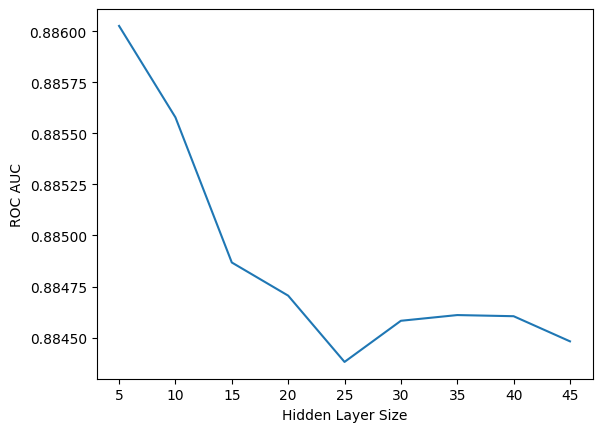

In [ ]:
plot = sns.lineplot(x = range(min_hidden_layer_size, max_hidden_layer_size, 5), y = cv_scores)
plot.set(xlabel = 'Hidden Layer Size', ylabel = 'ROC AUC')

In [ ]:
Opt_MLPC_model = MLPClassifier(hidden_layer_sizes = 5, activation = 'logistic', solver = 'adam', max_iter = 1000, random_state = 1)
Opt_MLPC_model.fit(X_train, Y_train)

y_pred_mlpc = Opt_MLPC_model.predict(X_test)

print("ROC AUC: ", roc_auc_score(Y_test, Opt_MLPC_model.predict_proba(X_test)[:,1]))
print(confusion_matrix(Y_test, y_pred_mlpc))
print(classification_report(Y_test, y_pred_mlpc))

ROC AUC:  0.7477407489880983
[[67675   106]
 [ 8622   202]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67781
           1       0.66      0.02      0.04      8824

    accuracy                           0.89     76605
   macro avg       0.77      0.51      0.49     76605
weighted avg       0.86      0.89      0.84     76605



**ROC AUC for All Models**

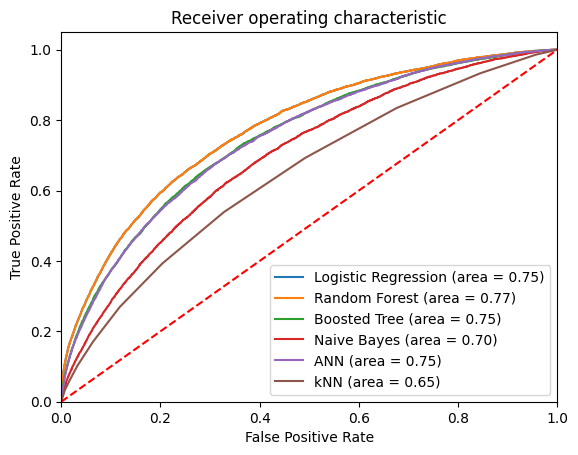

In [ ]:
lr_roc_auc = roc_auc_score(Y_test, logmodel.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, threshold = roc_curve(Y_test, y_pred_prob_rf)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression (area = %0.2f)' %lr_roc_auc)
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, threshold = roc_curve(Y_test, y_pred_prob_rf)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest (area = %0.2f)' %rf_roc_auc)
bt_roc_auc = roc_auc_score(Y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, threshold = roc_curve(Y_test, y_pred_prob_bt)
plt.plot(bt_fpr, bt_tpr, label = 'Boosted Tree (area = %0.2f)' %bt_roc_auc)
nb_roc_auc = roc_auc_score(Y_test, nb_model.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, threshold = roc_curve(Y_test, y_pred_prob_nb)
plt.plot(nb_fpr, nb_tpr, label = 'Naive Bayes (area = %0.2f)' %nb_roc_auc)
ann_roc_auc = roc_auc_score(Y_test, Opt_MLPC_model.predict_proba(X_test)[:,1])
ann_fpr, ann_tpr, threshold = roc_curve(Y_test, Opt_MLPC_model.predict_proba(X_test)[:,1])
plt.plot(ann_fpr, ann_tpr, label = 'ANN (area = %0.2f)' %ann_roc_auc)
knn_roc_auc = roc_auc_score(Y_test, knn1.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, threshold = roc_curve(Y_test, y_pred_prob_knn1)
plt.plot(knn_fpr, knn_tpr, label = 'kNN (area = %0.2f)' %knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.figure
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

The random forest model has the highest ROC AUC at 0.77, which means it is the best model.

**Strongest Features in Best Model**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

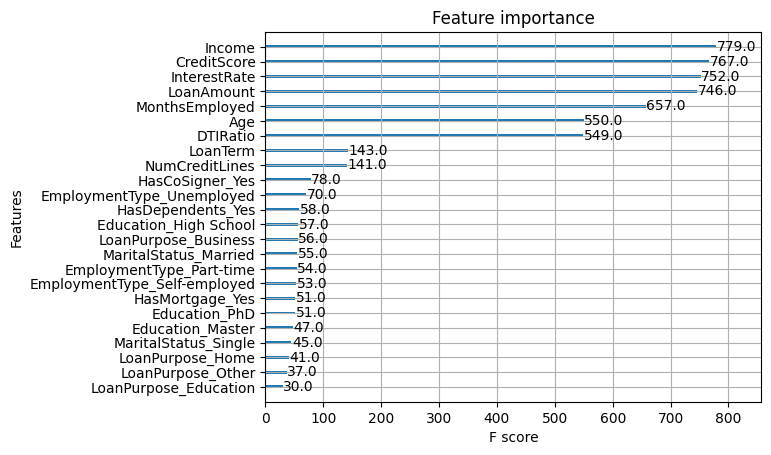

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X_rescaled, Y)

plot_importance(model)


Income, Credit Score, and Interest Rate have the strongest impact on the likelihood of a borrower to default on the loan.

**Visualization of Key Features and other factors of loan default**

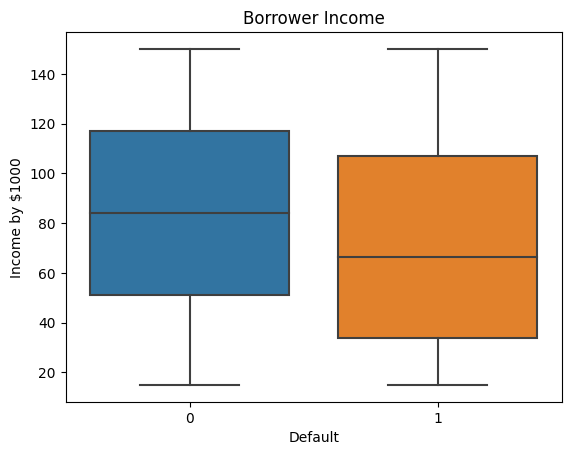

In [ ]:
loan['Income_Thousands'] = loan['Income']/1000
sns.boxplot(data=loan, x= 'Default', y='Income_Thousands')
plt.title('Borrower Income')
plt.ylabel('Income by $1000')
loan = loan.drop(['Income_Thousands'], axis = 1)

Text(0.5, 1.0, 'Credit Score of Employment Types')

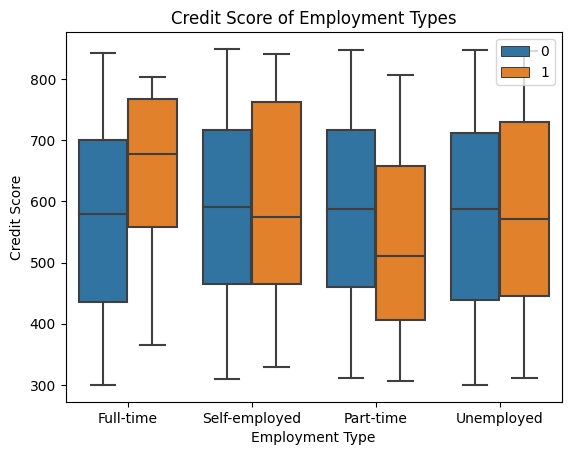

In [ ]:
sns.boxplot(data = loan.sample(1000), x = 'EmploymentType', y = 'CreditScore', hue = 'Default')
plt.legend(loc = 'upper right')
plt.xlabel('Employment Type')
plt.ylabel('Credit Score')
plt.title('Credit Score of Employment Types')

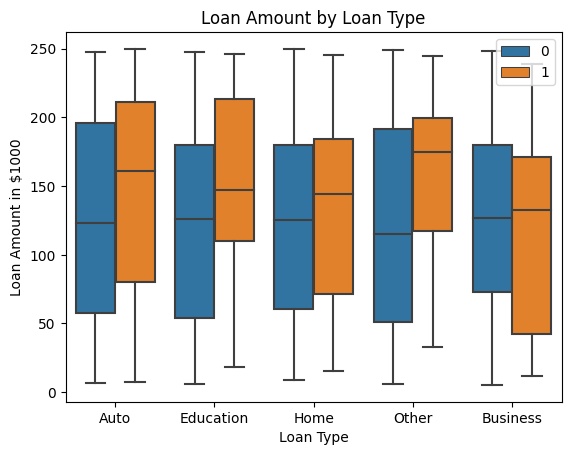

In [ ]:
loan['Loan_Amount_Thousands'] = loan['LoanAmount']/1000
sns.boxplot(data = loan.sample(1000), x = 'LoanPurpose', y = 'Loan_Amount_Thousands', hue = 'Default')
loan = loan.drop(['Loan_Amount_Thousands'], axis = 1)
plt.xlabel('Loan Type')
plt.ylabel('Loan Amount in $1000')
plt.title('Loan Amount by Loan Type')
plt.legend(loc = 'upper right')

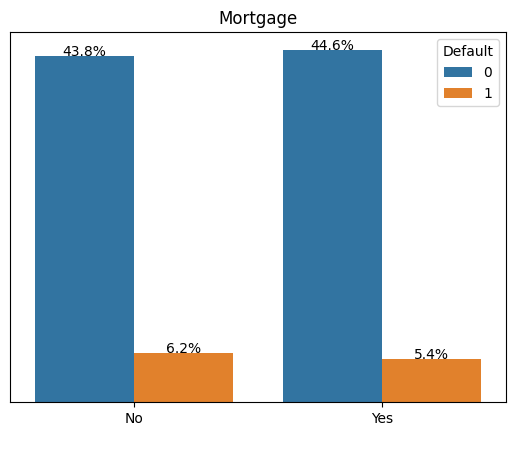

In [ ]:
loan['Mortgage'] = loan['HasMortgage'].replace({'Yes': 1, 'No': 0})
ax = sns.countplot(data=loan, x='Mortgage', hue='Default')

total_count = len(loan)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_count:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Mortgage')
plt.yticks([])
plt.xlabel(' ')
plt.ylabel('')
ax.set_xticklabels(["No", "Yes"])
loan = loan.drop(['Mortgage'], axis=1)

plt.show()

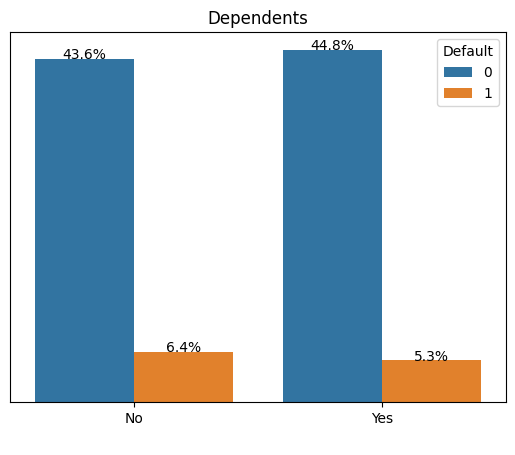

In [ ]:
loan['Dependents'] = loan['HasDependents'].replace({'Yes': 1, 'No': 0})
ax = sns.countplot(data=loan, x='Dependents', hue='Default')

total_count = len(loan)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_count:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Dependents')
plt.yticks([])
plt.xlabel(' ')
plt.ylabel('')
ax.set_xticklabels(["No", "Yes"])
loan = loan.drop(['Dependents'], axis=1)

plt.show()

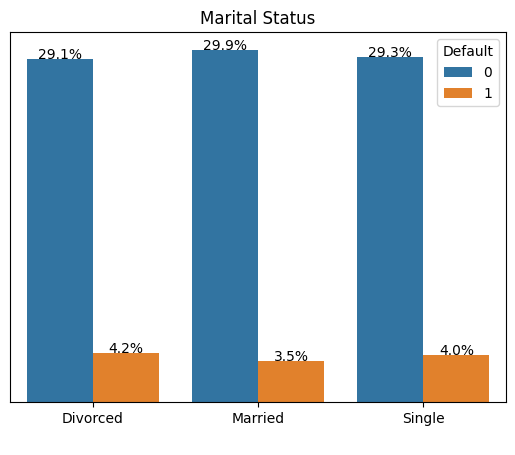

In [ ]:
ax = sns.countplot(data=loan, x='MaritalStatus', hue='Default')

total_count = len(loan)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_count:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Marital Status')
plt.yticks([])
plt.xlabel(' ')
plt.ylabel('')
plt.show()